In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Funktion:
$$
\Huge y = \sin(x^2) + \cos(x) \cdot e^{-\frac{x}{2}} + \frac{x}{5}
$$


In [2]:
np.random.seed(42)

x = np.linspace(-5, 5, 500)
y = np.sin(x**2) + np.cos(x) * np.exp(-x/2) + x/5

# Gauß-Rauschen hinzufügen
y += np.random.normal(0, 0.1, x.shape)

# Trainingsdatensätze in PyTorch-Tensoren umwandeln
x = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [3]:
# plt.ion()
# plt.show()
#    
# plt.scatter(x, y, c='red', s=5, label='training set')
# plt.grid()
# plt.legend()
# plt.title('Funktion mit Gauß-Rauschen')
#         
# plt.ioff()
# plt.show()

In [4]:
class RegressionNet(nn.Module):
    
    def __init__(self):
        
        super(RegressionNet, self).__init__()
        
        self.hidden1 = nn.Linear(1,50) 
        self.hidden2 = nn.Linear(50,100)
        self.hidden3 = nn.Linear(100,50)
        self.predict = nn.Linear(50,1)
        
    def forward(self, x):
        # die 1. versteckte Schicht
        x = self.hidden1(x)
        x = torch.relu(x)
        # die 2. versteckte Schicht
        x = self.hidden2(x)
        x = torch.sigmoid(x)
        # die 3. versteckte Schicht
        x = self.hidden3(x)
        x = torch.sigmoid(x)
        # Ausgabeschicht
        x =self.predict(x)

        return x

model = RegressionNet()

In [5]:
print(model)

RegressionNet(
  (hidden1): Linear(in_features=1, out_features=50, bias=True)
  (hidden2): Linear(in_features=50, out_features=100, bias=True)
  (hidden3): Linear(in_features=100, out_features=50, bias=True)
  (predict): Linear(in_features=50, out_features=1, bias=True)
)


In [6]:
# Definieren der Verlustfunktion: MSE
loss_func = torch.nn.MSELoss()
# Definieren des Optimierers: SGD mit Lernrate 0.1
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

In [7]:
def visualize():
    plt.cla()
    # Darstellung der Trainingsdaten     
    plt.scatter(x.detach().cpu().numpy(), y.detach().cpu().numpy(),
                    c='red', s=5, label='training set')
    # Darstellung der Anpassungskurve
    plt.plot(x.detach().cpu().numpy(), prediction.detach().cpu().numpy(),
                 c='green', linewidth=3, alpha=0.5, label='fitting')   
    plt.grid()
    plt.legend()
    plt.title(f'Epoch = {epoch}, Loss = %.4f' % loss.data, color='green') 
    plt.pause(0.05)

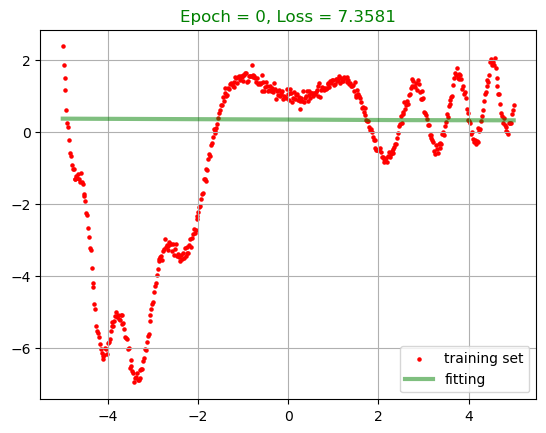

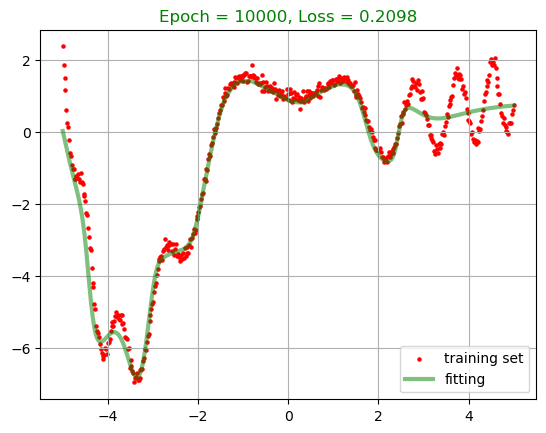

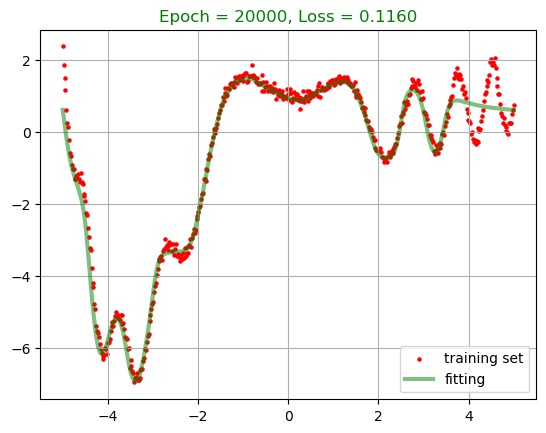

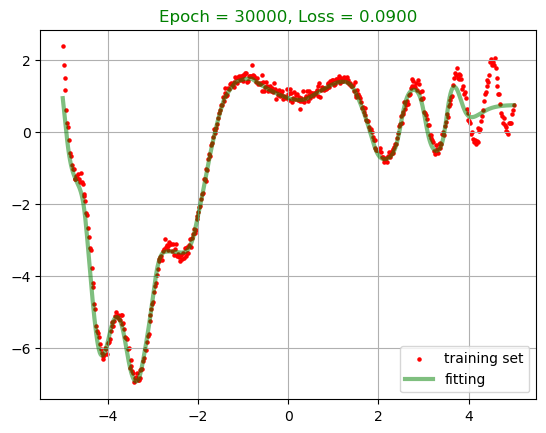

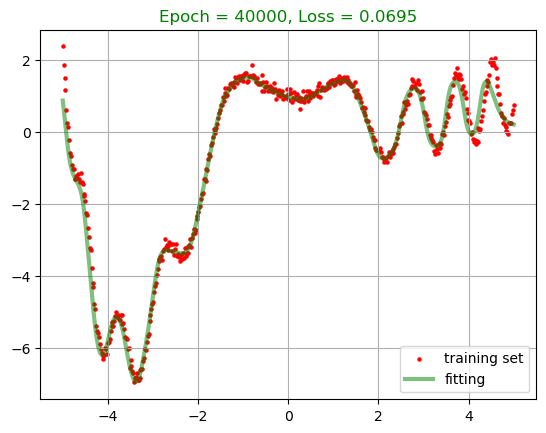

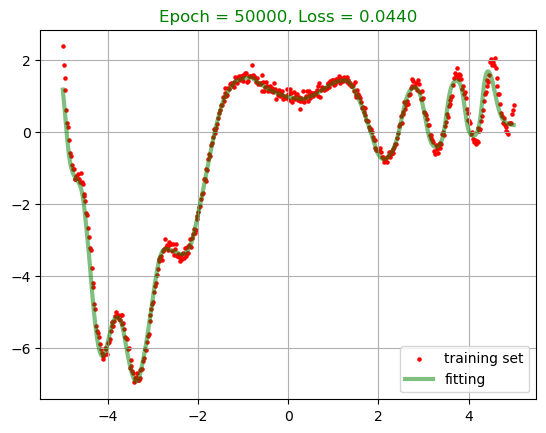

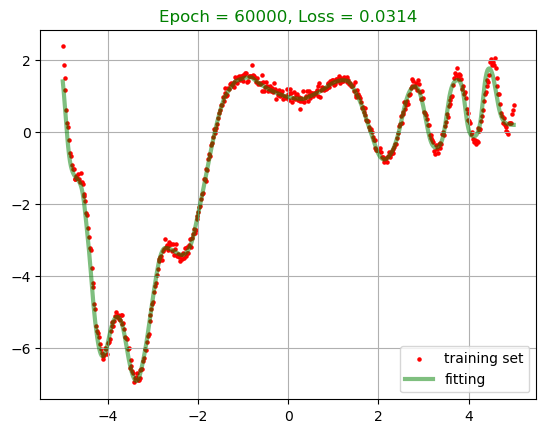

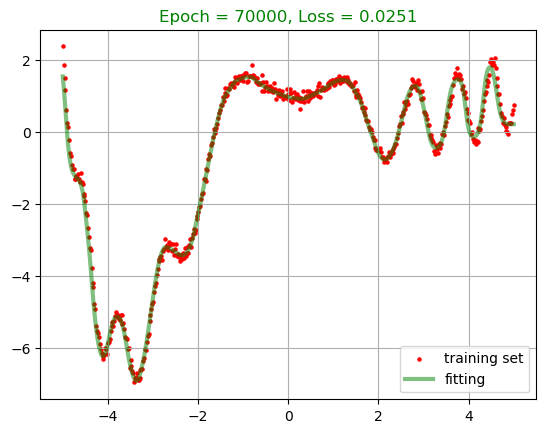

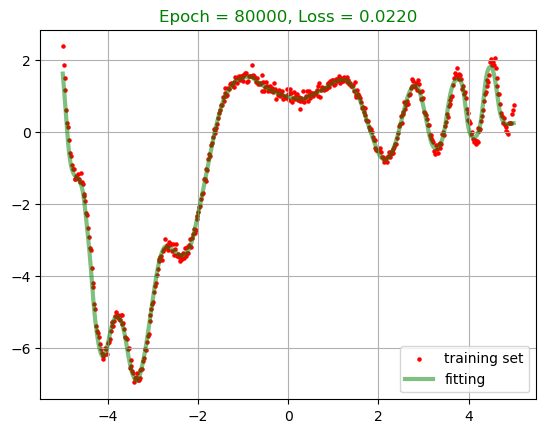

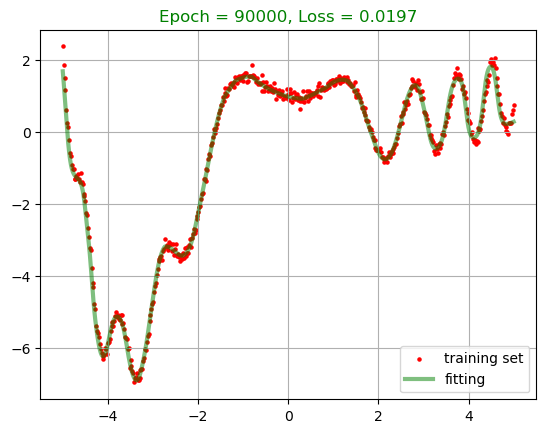

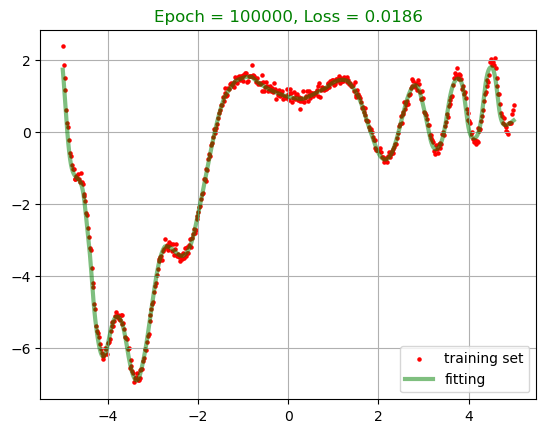

In [8]:
epoch_number = 100000
epoch_interval = 10000

plt.ion()
plt.show()

for epoch in range(epoch_number + 1):

    prediction = model(x)           # Schritt 1. Vorhersagewert berechnen
    loss = loss_func(prediction, y) # Schritt 2. Verlust berechnen
    loss.backward()                 # Schritt 3. Gradienten berechnen mit Rückwärtspropagation
    optimizer.step()                # Schritt 4. Parameter aktualisieren
    optimizer.zero_grad()           # Schritt 5. Gradienten zurücksetzen

    if epoch%epoch_interval == 0:   # Beim Auswertungsintervall das Ergebnis visualisieren 
        visualize()
        
plt.ioff()
plt.show()